In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('features.csv')
labels = pd.read_csv('labels.csv')
dataset.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
dataset.drop(labels='respondent_id', axis=1, inplace=True)
dataset.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
dataset = pd.concat([dataset,(labels.h1n1_vaccine)], axis=1)

In [5]:
dataset.info()
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [6]:
# the dataset has 26707 rows and 36 columns containing numeric as well as categorical variables

In [7]:
dataset.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [8]:
# Almost all features has nan values and some features have more than 50% empty columns. lets drop >50% empty columns

In [9]:
threshold = np.round(len(dataset)*0.5)
threshold

13354.0

In [10]:
dataset.dropna(thresh=threshold, axis=1, inplace=True)

In [11]:
dataset.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [12]:
#only 1 feature employment_occupation having more than 50% nan has been dropped.

In [13]:
# since employment_industry and health_insurance has around 13000 empty values, lets drop this column
dataset.drop(labels=['employment_industry','health_insurance'],axis=1, inplace=True)

In [14]:
dataset.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [15]:
#Lets determine which are the features with nan values
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in features_with_na:
    print('{} has {}% Nan values'.format(feature, (np.round(100*dataset[feature].isnull().mean(),4))))

h1n1_concern has 0.3445% Nan values
h1n1_knowledge has 0.4343% Nan values
behavioral_antiviral_meds has 0.2658% Nan values
behavioral_avoidance has 0.7788% Nan values
behavioral_face_mask has 0.0711% Nan values
behavioral_wash_hands has 0.1573% Nan values
behavioral_large_gatherings has 0.3258% Nan values
behavioral_outside_home has 0.307% Nan values
behavioral_touch_face has 0.4793% Nan values
doctor_recc_h1n1 has 8.0878% Nan values
doctor_recc_seasonal has 8.0878% Nan values
chronic_med_condition has 3.6358% Nan values
child_under_6_months has 3.0704% Nan values
health_worker has 3.0104% Nan values
opinion_h1n1_vacc_effective has 1.464% Nan values
opinion_h1n1_risk has 1.4528% Nan values
opinion_h1n1_sick_from_vacc has 1.479% Nan values
opinion_seas_vacc_effective has 1.7299% Nan values
opinion_seas_risk has 1.9246% Nan values
opinion_seas_sick_from_vacc has 2.0107% Nan values
education has 5.2683% Nan values
income_poverty has 16.5612% Nan values
marital_status has 5.272% Nan values

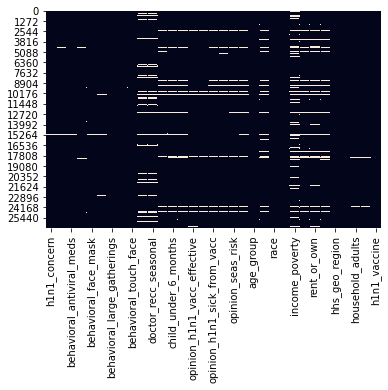

In [16]:
sns.heatmap(dataset.isnull(), cbar=False)

In [17]:
#Soring all numerical features:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype !='O']
numerical_features

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'h1n1_vaccine']

In [18]:
dataset[numerical_features].isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
household_adults                249
household_children              249
h1n1_vaccine                      0
dtype: int64

In [19]:
for feature in numerical_features:
    data= dataset.copy()
    print(feature,
          dataset[feature].value_counts())

h1n1_concern 2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
h1n1_knowledge 1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
behavioral_antiviral_meds 0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
behavioral_avoidance 1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
behavioral_face_mask 0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
behavioral_wash_hands 1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
behavioral_large_gatherings 0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
behavioral_outside_home 0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64
behavioral_touch_face 1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64
doctor_recc_h1n1 0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64
doctor_recc_seasonal 0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: i

In [20]:
# We can observe that there are no continuous features and all the features are discrete numerical features

In [21]:
# Filling the missing values of the numerical features with appropriate methods:
for feature in numerical_features:
    data = dataset.copy()
    dataset[feature] = dataset[feature].bfill()

In [22]:
dataset[numerical_features].isnull().sum() # ALl the numerical features have been filled with FFill method

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int64

In [23]:
#Soring all Categorical features:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype =='O']
categorical_features

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [24]:
dataset[categorical_features].isnull().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

In [25]:
for feature in categorical_features:
    data= dataset.copy()
    print(feature,
          dataset[feature].value_counts())

age_group 65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64
education College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64
race White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
sex Female    15858
Male      10849
Name: sex, dtype: int64
income_poverty <= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64
marital_status Married        13555
Not Married    11744
Name: marital_status, dtype: int64
rent_or_own Own     18736
Rent     5929
Name: rent_or_own, dtype: int64
employment_status Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64
hhs_geo_region lzgpxyit    4297
fpwskwrf    3265


In [26]:
#Fill all the categorical variables with bfill values:
for feature in categorical_features:
    data = dataset.copy()
    dataset[feature].fillna(dataset[feature].mode()[0], inplace=True)

In [27]:
dataset[categorical_features].isnull().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

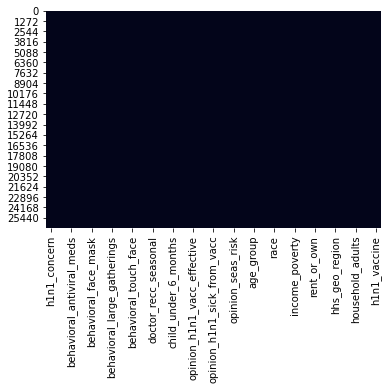

In [28]:
sns.heatmap(dataset.isnull(), cbar=False)

In [29]:
#Lets Label encode binary categorical features and one hot encode other features:

In [30]:
# getting the categorical features which are binary
binary_cat_features = [feature for feature in categorical_features if len(dataset[feature].unique())==2]
binary_cat_features

['sex', 'marital_status', 'rent_or_own']

In [31]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for feature in binary_cat_features:
    data= dataset.copy()
    dataset[feature] = enc.fit_transform(dataset[feature])

In [32]:
dataset[binary_cat_features].head()  # binary categorical features have been label encoded.

,sex,marital_status,rent_or_own
0,0,1,0
1,1,1,1
2,1,1,0
3,0,1,1
4,0,0,0


In [33]:
# getting non binary categorical features and one hot encoding them:
non_bin_cat_features = [feature for feature in categorical_features if len(dataset[feature].unique())>2]
non_bin_cat_features

['age_group',
 'education',
 'race',
 'income_poverty',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [34]:
# Writing a function to one hot encode all the features and concatinate them to dataset
def cat_var_convert(columns):
    data = dataset.copy()
    i=0
    for feature in non_bin_cat_features:
        print(feature)
        df1 = pd.get_dummies(dataset[feature], drop_first=True)
        dataset.drop([feature], axis=1, inplace=True)
        if i==0:
            data = df1.copy()
        else:
            data = pd.concat([data, df1], axis=1)
        i=i+1
    data = pd.concat([dataset, data], axis=1)
        
    return data

In [35]:
dataset = cat_var_convert(non_bin_cat_features)

age_group
education
race
income_poverty
employment_status
hhs_geo_region
census_msa


In [36]:
# the categorical variables have been successfully encoded.
dataset.shape

(26707, 51)

In [37]:
dataset.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,marital_status,rent_or_own,household_adults,household_children,h1n1_vaccine,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,< 12 Years,College Graduate,Some College,Hispanic,Other or Multiple,White,"> $75,000",Below Poverty,Not in Labor Force,Unemployed,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Principle City",Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0,1,0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,1,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1,1,0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0,1,1,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,0,0,0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# checking for any duplicated columns
duplicate_columns = dataset.columns[dataset.columns.duplicated()]
duplicate_columns
# no columns have been duplicated.

Index([], dtype='object')

# Model Building

In [39]:
X = dataset.drop(labels='h1n1_vaccine', axis=1)
y = dataset.h1n1_vaccine

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [ ]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbours', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   # print(msg)

In [44]:
# from the above, random forest and Logistic regression are giving the best accuracy.

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [46]:
model = RandomForestClassifier()

In [47]:
# Lets use Random forest classifier:

model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.8309120862662872

In [48]:
precision_score(y_test,y_predict)

0.6808236808236808

In [49]:
recall_score(y_test,y_predict)

0.375177304964539

In [50]:
roc_auc_score(y_test,y_predict)

0.6640458387363041

# Smoting the data

In [51]:
dataset['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [52]:
# we can observe that for our target variable, the instances for 0 is 4 times more than 1.
#Therefore we can expect some biasing of the model towards predicting 0. Lets SMOTE and check if performance increases

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [55]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 15766, 1: 4264})
Counter({0: 15766, 1: 15766})


In [56]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.8303130148270181


In [57]:
precision_score(y_test,y_predict)

0.6544035674470458

In [58]:
recall_score(y_test,y_predict)

0.41631205673758864

In [59]:
roc_auc_score(y_test,y_predict)

0.6787275111863375

In [60]:
# SMOTEing the dataset did improve the numbers for all the performance metrics

# Hyper parameter optimization

In [61]:
# using RandomizedSearchCV
# set up the random search with 4 fold cross validation

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# define the parameter dictionary to be taken by RandomCV

hyperparameter_grid = {
    'n_estimators': [1000,1200,1500,2000],
    'n_jobs': [1,2,3,4,5],
    'max_depth': [10,15,18,20,50],
    'min_samples_split': [1,2,5,10,20],
    'min_samples_leaf': [1,5,10,20,50],
    'random_state': [0,10,13,20,45]
    }


In [64]:
random_cv = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, 
                              cv=5, n_iter=50, scoring='neg_mean_absolute_error', n_jobs=4,
                              verbose=1, return_train_score=True, random_state=13)

In [65]:
#random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 22.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 27.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'max_depth': [10, 15, 18, 20, 50],
                                        'min_samples_leaf': [1, 5, 10, 20, 50],
                                        'min_samples_split': [1, 2, 5, 10, 20],
                                        'n_estimators': [1000, 1200, 1500,
                                                         2000],
                                        'n_jobs': [1, 2, 3, 4, 5],
                                        'random_state': [0, 10, 13, 20, 45]},
                   random_state=13, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [66]:
random_cv.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=2000, n_jobs=5,
                       random_state=10)

In [67]:
model = RandomForestClassifier(max_depth=20, n_estimators=2000, n_jobs=5,
                       random_state=10)

In [68]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.8345065149019021


# Feature Selection

In [69]:
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(model)
feature_sel_model.fit(X_train_smote,y_train_smote)

SelectFromModel(estimator=RandomForestClassifier(max_depth=20,
                                                 n_estimators=2000, n_jobs=5,
                                                 random_state=10))

In [70]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [71]:
# printing the number of total and selected features

selected_feat = X_train_smote.columns[(feature_sel_model.get_support())]

print('Total features:{}'.format((X_train_smote.shape[1])))
print('Selected Features:{}'.format(len(selected_feat)))

Total features:50
Selected Features:12


In [72]:
X = dataset[selected_feat]
y = dataset['h1n1_vaccine']

In [73]:
model = RandomForestClassifier(max_depth=20, n_estimators=2000, n_jobs=5,
                       random_state=10)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, n_estimators=2000, n_jobs=5,
                       random_state=10)

In [75]:
score = cross_val_score(model, X,y, cv=5, scoring='accuracy' )
score

array([0.80887308, 0.80307001, 0.81501591, 0.82156899, 0.81145853])

In [74]:
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.8345065149019021
